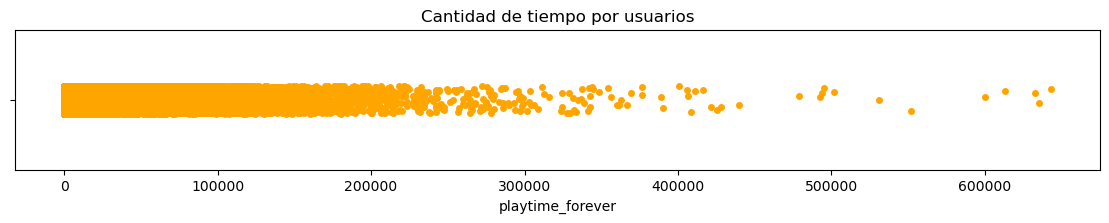

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pyarrow.parquet as pq

# Directorio que contiene los archivos Parquet
dir = '../data_sources/parquet/user_items'

# Lista para almacenar los DataFrames
list_of_dfs = []

# Recorrer los archivos Parquet en el directorio
for file in os.listdir(dir):
    if file.endswith('.parquet'):
        # Leer el archivo Parquet
        list_of_dfs.append(pq.read_table(os.path.join(dir, file)).to_pandas())

user_items_df = pd.concat(list_of_dfs, ignore_index=True)

time_count = user_items_df.groupby('user_id')['playtime_forever'].unique().explode()
time_count= pd.DataFrame(time_count)
time_count_user = time_count.sort_values('playtime_forever', ascending=False)

fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(211)
sns.stripplot(data=time_count_user, x='playtime_forever', ax=ax1, color="red")
ax1.set_xlabel('playtime_forever') ; ax1.set_title('Tiempo por usuario')
plt.show()